## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt

## Load data and Initial Explorations

### Data Attributions
* TRU - total registration User (Same paltform, same country, should be the same= > check)
* DAU - daily active user (Same paltform, same country, should be the same= > check)
* Items - Items bought 
* Trans - Transactions
* Items Per Trans - items bought per transaction
* Items per DAU - items bought per DAU
* Conversion - % of people bought any items 
* Cash flow - existing credits in user account
* Return Customer - Number of player returned 
* Time Spend Per Day(seconds) - Time Spend in platform

### Checks to Be Performed
* sanity check: Same platform, same country, same day should be the same
* missing data check: check if any missing value, e.g. NAN.
* duplication removal: remove duplicates
* outlier removal: remove abnormal data points
* attribution checks: timespan, # of countries, # platform

### Relations To Be Explored
* Comparisons between platforms, countries (continents), date (visualize seperately)
* Explore correlations between topline metrics (auto-correlations???)

In [2]:
pd_df = pd.read_csv('topline_metrics.csv',index_col=0, parse_dates=True)

In [3]:
pd_df.head()

,Date.1,Platform,Country,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
Date,,,,,,,,,,,,,
2018-03-15,2018-03-15,Android(All),Kazakhstan(哈萨克斯坦),628852.81,15498.31,43429.11,3428.09,17.58,1.3,2.3,4527.01,79.12,58.18
2018-03-15,2018-03-15,ALL,United States(美国),633293.54,19939.05,43429.11,3428.09,17.58,1.3,2.3,4527.01,75.65,58.87
2018-03-15,2018-03-15,Android(All),Kazakhstan(哈萨克斯坦),628852.81,15498.31,43429.11,3428.09,17.58,1.3,2.3,4527.01,79.12,58.18
2018-03-15,2018-03-15,ALL,Guatemala(危地马拉),628976.03,15621.54,43429.11,3428.09,17.58,1.3,2.3,4527.01,74.62,46.21
2018-03-15,2018-03-15,Android(All),Belarus(白俄罗斯),629154.54,15800.04,43429.11,3428.09,17.58,1.3,2.3,4527.01,76.97,56.92


In [4]:
pd_df.tail()

,Date.1,Platform,Country,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
Date,,,,,,,,,,,,,
2020-03-09,2020-03-09,Android(All),Hungary(匈牙利),674332.38,16046.49,69466.62,5232.72,34.20,1.95,6.85,6171.56,12.21,92.85
2020-03-09,2020-03-09,IOS(All),Malaysia(马来西亚),836337.58,17843.06,186336.60,15908.46,30.76,2.09,9.22,23524.53,12.21,126.36
2020-03-09,2020-03-09,ALL,Cyprus(塞浦路斯),636603.37,15376.24,50669.49,3813.89,39.19,2.34,7.88,4998.04,12.21,124.29
2020-03-09,2020-03-09,Android(All),Montenegro(黑山),640738.92,15470.67,44364.24,3492.58,34.28,1.39,2.91,4621.45,12.21,125.79
2020-03-09,2020-03-09,IOS(All),Turks and Caicos Islands(特克斯和凯科斯群岛),628743.40,15293.32,43630.64,3433.85,57.87,3.69,9.15,4547.74,12.21,95.15


In [5]:
pd_df.describe()

,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
count,7.482640e+05,7.482640e+05,7.482640e+05,748264.00000,748264.000000,748264.000000,748264.000000,748264.000000,748264.000000,748264.000000
mean,7.399568e+05,1.816949e+04,5.089120e+04,3958.49364,31.569433,1.414330,2.902036,5093.453512,39.795054,122.605716
std,6.776595e+05,1.801799e+04,4.610241e+04,3655.62504,23.629177,1.208879,2.591666,4712.790645,24.796009,43.331318
min,6.286478e+05,1.529217e+04,4.342911e+04,3428.09000,17.580000,1.300000,2.300000,4527.010000,12.210000,-9.990000
25%,6.288102e+05,1.529677e+04,4.342911e+04,3428.09000,17.580000,1.300000,2.300000,4527.010000,28.660000,98.950000
50%,6.314452e+05,1.537393e+04,4.352124e+04,3433.85000,28.090000,1.320000,2.560000,4532.770000,39.430000,118.180000
75%,6.574735e+05,1.617663e+04,4.466021e+04,3522.53000,36.080000,1.390000,3.000000,4611.080000,48.920000,139.370000
max,2.677675e+07,2.141935e+06,4.387412e+06,434846.58000,1744.870000,444.240000,232.630000,819825.280000,3912.090000,1390.060000


In [6]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 748264 entries, 2018-03-15 to 2020-03-09
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date.1                       748264 non-null  object 
 1   Platform                     748264 non-null  object 
 2   Country                      748264 non-null  object 
 3   TRU                          748264 non-null  float64
 4   DAU                          748264 non-null  float64
 5   Items                        748264 non-null  float64
 6   Trans                        748264 non-null  float64
 7   Items Per Trans              748264 non-null  float64
 8   Items per DAU                748264 non-null  float64
 9   Conversion                   748264 non-null  float64
 10  Cash Flow                    748264 non-null  float64
 11  Return Customer              748264 non-null  float64
 12  Time Spend Per Day(seconds)  748264 non-nu

### remove duplications

In [7]:
pd_no_dup = pd_df.drop_duplicates()

In [8]:
pd_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387287 entries, 2018-03-15 to 2020-03-09
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date.1                       387287 non-null  object 
 1   Platform                     387287 non-null  object 
 2   Country                      387287 non-null  object 
 3   TRU                          387287 non-null  float64
 4   DAU                          387287 non-null  float64
 5   Items                        387287 non-null  float64
 6   Trans                        387287 non-null  float64
 7   Items Per Trans              387287 non-null  float64
 8   Items per DAU                387287 non-null  float64
 9   Conversion                   387287 non-null  float64
 10  Cash Flow                    387287 non-null  float64
 11  Return Customer              387287 non-null  float64
 12  Time Spend Per Day(seconds)  387287 non-nu

In [9]:
pd_no_dup.describe()

,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
count,3.872870e+05,3.872870e+05,3.872870e+05,387287.000000,387287.000000,387287.000000,387287.000000,387287.000000,387287.000000,387287.000000
mean,7.405406e+05,1.814749e+04,5.090994e+04,3958.958757,31.588136,1.415199,2.900178,5092.220355,39.803183,122.565397
std,6.836457e+05,1.706030e+04,4.659028e+04,3653.633879,23.878126,1.344340,2.579061,4656.117813,24.101990,43.372413
min,6.286478e+05,1.529217e+04,4.342911e+04,3428.090000,17.580000,1.300000,2.300000,4527.010000,12.210000,-9.990000
25%,6.288102e+05,1.529677e+04,4.342911e+04,3428.090000,17.580000,1.300000,2.300000,4527.010000,28.660000,98.840000
50%,6.314659e+05,1.537393e+04,4.352009e+04,3433.850000,28.070000,1.320000,2.560000,4532.770000,39.440000,118.180000
75%,6.574378e+05,1.617778e+04,4.466252e+04,3522.530000,36.070000,1.390000,3.000000,4611.080000,48.915000,139.370000
max,2.677675e+07,2.141935e+06,4.387412e+06,434846.580000,1744.870000,444.240000,232.630000,819825.280000,3912.090000,1390.060000


### Sevral Obvious Anomalies Can Be Found
* More than 50% duplications
* Lower Bonuded: The minimal value == 25% Quantiles for many columns (except TRU and DAU, Time Spend, Return Customer).
* Extreme Values: Max > 100X Mean

### Check Missing Data: Nan

In [10]:
pd_no_dup.isna().sum()

Date.1                         0
Platform                       0
Country                        0
TRU                            0
DAU                            0
Items                          0
Trans                          0
Items Per Trans                0
Items per DAU                  0
Conversion                     0
Cash Flow                      0
Return Customer                0
Time Spend Per Day(seconds)    0
dtype: int64

In [20]:
pd_no_dup.isnull().sum()

Date.1                         0
Platform                       0
Country                        0
TRU                            0
DAU                            0
Items                          0
Trans                          0
Items Per Trans                0
Items per DAU                  0
Conversion                     0
Cash Flow                      0
Return Customer                0
Time Spend Per Day(seconds)    0
dtype: int64

### Attributions: (date, platform, countries) range check

In [11]:
attrs = list(pd_no_dup.columns.to_list())[1:]

In [12]:
f'All attributions {attrs}'

"All attributions ['Platform', 'Country', 'TRU', 'DAU', 'Items', 'Trans', 'Items Per Trans', 'Items per DAU', 'Conversion', 'Cash Flow', 'Return Customer', 'Time Spend Per Day(seconds)']"

In [13]:
platforms = pd_no_dup.Platform.unique()
print(f'All Platforms: {platforms}')

All Platforms: ['Android(All)' 'ALL' 'IOS(All)']


In [14]:
countries = pd_no_dup.Country.unique()
f'Totoal {len(countries)} Countries'

'Totoal 239 Countries'

Text(0.5, 1.0, 'Date Range: 2018-03-15 00:00:00 to 2020-03-09 00:00:00, Total 724 Days')

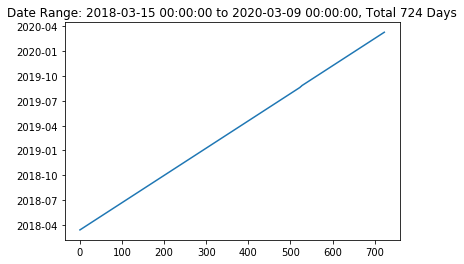

In [16]:
datetime = pd_no_dup.index.unique()
plt.plot(datetime)
plt.title(f'Date Range: {min(datetime)} to {max(datetime)}, Total {len(datetime)} Days')

## Basic Visualization => dashboard, with dropdown: platforms, countries, date_from, date_end, topline_metircs (turn on/off)
* Group by platform, countires

## Define Filter Functions Based on Filters to Retrive Required Data

In [17]:
def get_filtered_data(df, filters):
    '''
    Based on the filters to get the needed data.
    Use DFS to get all data.
    
    ----params----------
    --inputs--
    df: pd.DataFrame source dataframe
    filters: list(dict{'filtername': filter_values}), list of dict-filters
    --returns--
    bool_filters: list of bool array
    attr_filters: list of applied filters
    '''
    #store all results in bool_filters and attr_filters
    bool_filters = []
    attr_filters = []
    # initilizations
    attr = ''
    bool_init = np.array([True]*len(df.index))
    index = 0 # index keep track of which filter is applied now, indicator of dfs exit.
    # start dfs to get bool masks/bool_filters and legends/attr_filtes
    dfs_bool(df, filters, bool_filters, attr_filters, index, attr, bool_init)
    return bool_filters, attr_filters

def dfs_bool(df, filters, bool_filters, attr_filters, index, attr, bool_init):
    '''
    Based on the filters to get the needed data.
    Use DFS to get all data.
    
    ----params----------
    --inputs--
    df: pd.DataFrame source dataframe
    filters: list(dict{'filtername': filter_values}), list of dict-filters.
    bool_filters: list(np.array(True, False....)) store all bool arries 
    att_filters: np.array(str,...) store the filters, so can be used as the legend latter.
    index: int  current index of filters
    bool_init: np.array(True, False) current bool values, True mean the corresponding rows will be selected, vice verse.
    '''
    if index == len(filters):
        bool_filters.append(bool_init)
        attr_filters.append(attr)
        return 
    filter_name, values = list(filters[index].keys())[0], list(filters[index].values())[0]
    for v in values:
        #print(f'{filter_name}:{v}')
        #print(f'{filter_name}:{values}')
        bool_next = bool_init & np.array((df[filter_name]==v).to_list())
        attr_next = attr + v
        dfs_bool(df, filters, bool_filters, attr_filters, index + 1, attr_next, bool_next)
    return

In [18]:
def explore_data(df, sample_size):
    '''
    Generate Random Sampled Data by Country and store them under './images/' folder
    '''
    # get attributions
    attrs = list(df.columns.to_list())[1:]
    platforms = df.Platform.unique()
    countries = df.Country.unique()
    # generate ramdonm index
    random_index = np.random.choice(list(range(len(countries))),size=sample_size,replace=False)
    # get filter ready
    filter_country = list(countries[random_index])
    filter_platform = list(platforms)
    filter_date = [min(datetime), max(datetime)]
    filter_attr = attrs
    # main loop to generate sampled data and corresponding images
    for country in filter_country:
        filters = [dict({attrs[0]:filter_platform}),dict({attrs[1]:[country]})]
        # get masks and describtions
        bool_filters, attr_filters = get_filtered_data(pd_no_dup, filters)
        for metric in attrs[2:]:  
            fig = go.Figure(data= [
                            dict(
                                x=pd_no_dup[b].index,
                                y=pd_no_dup[b][metric],
                                #text=df[df['continent'] == i]['country'],
                                mode='lines+markers',
                                opacity=0.7,
                                marker={
                                    'size': 9,
                                    'line': {'width': 1}
                                },
                                name=a
                            ) for b,a in zip(bool_filters,attr_filters)
                        ],
                            layout= dict(
                            xaxis={'title': 'Time'},
                            yaxis={'title': metric,'type':'linear'},
                            margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
                            #legend={'x': 0, 'y': 0.3},
                            hovermode='closest')
                           )
            # save figures
            fig.write_image('images/'+f'{attr_filters[0]}'+f'{metric}'+'.png')

In [19]:
# Visualizations for Filtered Data
import plotly.graph_objects as go
import os
if not os.path.exists("images"):
    os.mkdir("images")
    
explore_data(df=pd_no_dup, sample_size=len(countries))